In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score


def identificate_gresit(nume_fisiere, y):
    linii_gresite=[]
    linii = nume_fisiere.shape[0]                           
    for i in range(linii):                                 
        if nume_fisiere[i][2] == "#":
            nota = nume_fisiere[i][:3]                      
        else:
            nota = nume_fisiere[i][:2]                     
        if sorted(y[i]) != sorted(nota):                    
            linii_gresite.append(i+2)                       
            print("Nota identificata gresit in pe randul {}, nota adevarata {}, " \
                  "nota falsa {}.".format(i+2, nota, y[i]))
    print("\nNumar note identificate gresit: " \
          "{}.".format(len(linii_gresite)))
    
    return linii_gresite


def schimbare_clase(nume_fisiere, y, linii_gresite):
    indecsi_gresiti = [i - 2 for i in linii_gresite]
    for i in indecsi_gresiti:
        if nume_fisiere[i][2] == "#":
            y[i] = nume_fisiere[i][:3]
        else:
            y[i] = nume_fisiere[i][:2]
    print("\nClase gresite schimbate.")
    
    return 0


def stergere_clase(nume_fisiere, X, y, linii_gresite):
    indecsi_gresiti = [i - 2 for i in linii_gresite]
    nume_fisiere = np.delete(nume_fisiere, indecsi_gresiti)
    X = np.delete(X, indecsi_gresiti)
    y = np.delete(y, indecsi_gresiti)
    print("\nClase gresite sterse.")
             
    return nume_fisiere, X, y


def kmeans_acuratete(clustere, clase):
    dictionar = {}
    clustere_unice = np.unique(clustere)
    for i in range(len(clustere_unice)):
        masca = np.where(clustere == i, 1, 0)
        aparitii_etichete = np.bincount(clase[masca==1])
        eticheta_aleasa = aparitii_etichete.argmax()
        dictionar[i] = eticheta_aleasa

    clustere_clase = np.random.rand(len(clustere))
    for i in range(len(clustere)):
        clustere_clase[i] = dictionar[clustere[i]]

    acuratete = accuracy_score(clustere_clase, clase)
    
    return acuratete, clustere_clase

In [5]:
# AUTOCORELATIE
# 1. etichete date de numele fisierului

In [15]:
df = pd.read_csv('autocor_trainsitest.csv')    
nume_fisiere = df.iloc[:, 0].values
frecvente = df.iloc[:, 1].values
note = df.iloc[:, 2].values

linii_gresite = identificate_gresit(nume_fisiere, note)
schimbare_clase(nume_fisiere, note, linii_gresite)
linii_gresite = identificate_gresit(nume_fisiere, note)

X = frecvente                            
X = X.reshape(-1,1)
kmeans = MiniBatchKMeans(n_clusters=37)
kmeans.fit(X)
clustere = kmeans.fit_predict(X)

le = LabelEncoder()
clase = le.fit_transform(note)

acuratete, clustere_clase = kmeans_acuratete(clustere, clase)
print('Acuratete:', acuratete)

Nota identificata gresit in pe randul 4, nota adevarata A3#, nota falsa A#2.
Nota identificata gresit in pe randul 14, nota adevarata A3, nota falsa A2.
Nota identificata gresit in pe randul 36, nota adevarata A4, nota falsa A2.
Nota identificata gresit in pe randul 46, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 51, nota adevarata A5#, nota falsa A#4.
Nota identificata gresit in pe randul 53, nota adevarata A5#, nota falsa A#4.
Nota identificata gresit in pe randul 54, nota adevarata A5#, nota falsa A#4.
Nota identificata gresit in pe randul 55, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 68, nota adevarata B3, nota falsa B2.
Nota identificata gresit in pe randul 78, nota adevarata B4, nota falsa G2.
Nota identificata gresit in pe randul 119, nota adevarata C4#, nota falsa C#3.
Nota identificata gresit in pe randul 128, nota adevarata C4#, nota falsa D#4.
Nota identificata gresit in pe randul 131, nota adevarata C4, nota fals

D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [11]:
# CEPSTRUM
# 1. etichete date de numele fisierului

In [16]:
df = pd.read_csv('cepstrum_trainsitest.csv')    
nume_fisiere = df.iloc[:, 0].values
frecvente = df.iloc[:, 1].values
note = df.iloc[:, 2].values

linii_gresite = identificate_gresit(nume_fisiere, note)
schimbare_clase(nume_fisiere, note, linii_gresite)
linii_gresite = identificate_gresit(nume_fisiere, note)

X = frecvente                            
X = X.reshape(-1,1)
kmeans = MiniBatchKMeans(n_clusters=37)
kmeans.fit(X)
clustere = kmeans.fit_predict(X)

le = LabelEncoder()
clase = le.fit_transform(note)

acuratete, clustere_clase = kmeans_acuratete(clustere, clase)
print('Acuratete:', acuratete)

print('\n')

Nota identificata gresit in pe randul 4, nota adevarata A3#, nota falsa A#2.
Nota identificata gresit in pe randul 11, nota adevarata A3#, nota falsa A#2.
Nota identificata gresit in pe randul 31, nota adevarata A4#, nota falsa A#2.
Nota identificata gresit in pe randul 45, nota adevarata A4, nota falsa G#4.
Nota identificata gresit in pe randul 46, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 47, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 48, nota adevarata A5#, nota falsa A#2.
Nota identificata gresit in pe randul 49, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 50, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 51, nota adevarata A5#, nota falsa F#3.
Nota identificata gresit in pe randul 52, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 53, nota adevarata A5#, nota falsa A#2.
Nota identificata gresit in pe randul 54, nota adevarata A5#, nota

D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [ ]:
# AUTOCORELATIE
# 2. Se sterg datele gresite

In [27]:
df = pd.read_csv('autocor_trainsitest.csv')    
nume_fisiere = df.iloc[:, 0].values
frecvente = df.iloc[:, 1].values
note = df.iloc[:, 2].values

linii_gresite = identificate_gresit(nume_fisiere, note)
nume_fisiere, frecvente, note = stergere_clase(nume_fisiere, frecvente, note, linii_gresite)
linii_gresite = identificate_gresit(nume_fisiere, note)

X = frecvente                            
X = X.reshape(-1,1)
kmeans = MiniBatchKMeans(n_clusters=37)
kmeans.fit(X)
clustere = kmeans.fit_predict(X)

le = LabelEncoder()
clase = le.fit_transform(note)

acuratete, clustere_clase = kmeans_acuratete(clustere, clase)
print('Acuratete:', acuratete)

print('\n')

Nota identificata gresit in pe randul 4, nota adevarata A3#, nota falsa A#2.
Nota identificata gresit in pe randul 14, nota adevarata A3, nota falsa A2.
Nota identificata gresit in pe randul 36, nota adevarata A4, nota falsa A2.
Nota identificata gresit in pe randul 46, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 51, nota adevarata A5#, nota falsa A#4.
Nota identificata gresit in pe randul 53, nota adevarata A5#, nota falsa A#4.
Nota identificata gresit in pe randul 54, nota adevarata A5#, nota falsa A#4.
Nota identificata gresit in pe randul 55, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 68, nota adevarata B3, nota falsa B2.
Nota identificata gresit in pe randul 78, nota adevarata B4, nota falsa G2.
Nota identificata gresit in pe randul 119, nota adevarata C4#, nota falsa C#3.
Nota identificata gresit in pe randul 128, nota adevarata C4#, nota falsa D#4.
Nota identificata gresit in pe randul 131, nota adevarata C4, nota fals

D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


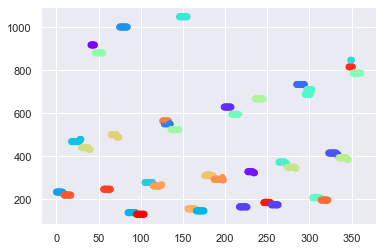

In [28]:
concat = np.column_stack((nume_fisiere, X, note))
indecsi = [i for i in range(X.shape[0])]
titlu = ['fisier', 'pitch', 'nota']
df_sterse = pd.DataFrame(data=concat,
                      index=indecsi,
                      columns=titlu)
# df_sterse.to_csv('autocor_trainsitest_sterse.csv', index=False)   #salvare ca fisier csv, fara indecsi

# Plot
df_cu_clustere = df_sterse.copy()
df_cu_clustere['cluster'] = clustere
# df_sterse.to_csv('autocor_trainsitest_sterse_clustere.csv', index=False)   #salvare ca fisier csv, fara indecsi
indecsi_csv = [i+2 for i in indecsi]
plt.figure(1)
plt.scatter(indecsi, df_cu_clustere['pitch'],
                c=df_cu_clustere['cluster'], cmap='rainbow')
plt.show()

In [13]:
# CEPSTRUM
# 2. Se sterg datele gresite

In [10]:
df = pd.read_csv('cepstrum_trainsitest.csv')    
nume_fisiere = df.iloc[:, 0].values
frecvente = df.iloc[:, 1].values
note = df.iloc[:, 2].values

linii_gresite = identificate_gresit(nume_fisiere, note)
nume_fisiere, frecvente, note = stergere_clase(nume_fisiere, frecvente, note, linii_gresite)
linii_gresite = identificate_gresit(nume_fisiere, note)

X = frecvente                            
X = X.reshape(-1,1)
kmeans = MiniBatchKMeans(n_clusters=37)
kmeans.fit(X)
clustere = kmeans.fit_predict(X)

le = LabelEncoder()
clase = le.fit_transform(note)

acuratete, clustere_clase = kmeans_acuratete(clustere, clase)
print('Acuratete:', acuratete)

print('\n')

Nota identificata gresit in pe randul 4, nota adevarata A3#, nota falsa A#2.
Nota identificata gresit in pe randul 11, nota adevarata A3#, nota falsa A#2.
Nota identificata gresit in pe randul 31, nota adevarata A4#, nota falsa A#2.
Nota identificata gresit in pe randul 45, nota adevarata A4, nota falsa G#4.
Nota identificata gresit in pe randul 46, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 47, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 48, nota adevarata A5#, nota falsa A#2.
Nota identificata gresit in pe randul 49, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 50, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 51, nota adevarata A5#, nota falsa F#3.
Nota identificata gresit in pe randul 52, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 53, nota adevarata A5#, nota falsa A#2.
Nota identificata gresit in pe randul 54, nota adevarata A5#, nota

D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [15]:
# Plot clustere

#stergere greseli
df = pd.read_csv('autocor_trainsitest.csv')
nume_fisiere = df.iloc[:, 0].values
frecvente = df.iloc[:, 1].values
note = df.iloc[:, 2].values
X = frecvente
linii_gresite = identificate_gresit(nume_fisiere, note)
nume_fisiere, X, note = stergere_clase(nume_fisiere, X, note, linii_gresite)
linii_gresite = identificate_gresit(nume_fisiere, note)

# refacere dataset 
concat = np.column_stack((nume_fisiere, X, note))
indecsi = [i for i in range(X.shape[0])]
titlu = ['fisier', 'pitch', 'nota']
df_sterse = pd.DataFrame(data=concat,
                      index=indecsi,
                      columns=titlu)
# df_sterse.to_csv('autocor_trainsitest_sterse.csv', index=False)   #salvare ca fisier csv, fara indecsi

# K-means
X = X.reshape(-1,1)
kmeans = MiniBatchKMeans(n_clusters=37)
kmeans.fit(X)
clustere = kmeans.fit_predict(X)
erori_kmeans(note, clustere)      #script detectie erori

# Plot
df_cu_clustere = df_sterse.copy()
df_cu_clustere['cluster'] = clustere
# df_sterse.to_csv('autocor_trainsitest_sterse_clustere.csv', index=False)   #salvare ca fisier csv, fara indecsi
indecsi_csv = [i+2 for i in indecsi]
plt.figure(1)
plt.scatter(indecsi, df_cu_clustere['pitch'],
                c=df_cu_clustere['cluster'], cmap='rainbow')
plt.show()

Nota identificata gresit in pe randul 4, nota adevarata A3#, nota falsa A#2.
Nota identificata gresit in pe randul 14, nota adevarata A3, nota falsa A2.
Nota identificata gresit in pe randul 36, nota adevarata A4, nota falsa A2.
Nota identificata gresit in pe randul 46, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 51, nota adevarata A5#, nota falsa A#4.
Nota identificata gresit in pe randul 53, nota adevarata A5#, nota falsa A#4.
Nota identificata gresit in pe randul 54, nota adevarata A5#, nota falsa A#4.
Nota identificata gresit in pe randul 55, nota adevarata A5#, nota falsa D#4.
Nota identificata gresit in pe randul 68, nota adevarata B3, nota falsa B2.
Nota identificata gresit in pe randul 78, nota adevarata B4, nota falsa G2.
Nota identificata gresit in pe randul 119, nota adevarata C4#, nota falsa C#3.
Nota identificata gresit in pe randul 128, nota adevarata C4#, nota falsa D#4.
Nota identificata gresit in pe randul 131, nota adevarata C4, nota fals

D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


NameError: name 'erori_kmeans' is not defined